[View in Colaboratory](https://colab.research.google.com/github/ankitbit/Deep_Learning/blob/master/Personal%20Projects/Wood_Knot_Clasification_Problem.ipynb)

In [1]:
! ls

sample_data


There is a condition of class imbalance from which our learning algorithm will suffer. What this means is that algorithm will give extra weight to the classification into the class which is having most of the images thereby creating a situation of imbalanced dataset. So, the idea is to read the images from each of the class in such a way that balance can be maintained. The following implementation makes an attempt in that direction.

In [46]:
# Downloading the data and label files
! wget http://www.ee.oulu.fi/research/imag/knots/KNOTS/knots.zip
! unzip knots.zip
! rm knots.zip
! wget http://www.ee.oulu.fi/research/imag/knots/KNOTS/names.txt
! wget http://www.ee.oulu.fi/research/imag/knots/KNOTS/ppm.txt
! mkdir ppm
! mkdir names
! mv ppm.txt /content/ppm/
! mv names.txt /content/names/
! pwd

--2018-10-22 19:04:46--  http://www.ee.oulu.fi/research/imag/knots/KNOTS/knots.zip
Resolving www.ee.oulu.fi (www.ee.oulu.fi)... 130.231.61.28, 2001:708:520:80::28
Connecting to www.ee.oulu.fi (www.ee.oulu.fi)|130.231.61.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8505865 (8.1M) [application/zip]
Saving to: ‘knots.zip’

knots.zip           100%[===================>]   8.11M  3.01MB/s    in 2.7s    

2018-10-22 19:04:50 (3.01 MB/s) - ‘knots.zip’ saved [8505865/8505865]

Archive:  knots.zip
replace knot0001.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: knot0001.ppm            
  inflating: knot0002.ppm            
  inflating: knot0003.ppm            
  inflating: knot0004.ppm            
  inflating: knot0005.ppm            
  inflating: knot0006.ppm            
  inflating: knot0007.ppm            
  inflating: knot0008.ppm            
  inflating: knot0009.ppm            
  inflating: knot0010.ppm            
  inflating: knot0011.ppm        

In [4]:
! pip install python-resize-image
! pip install Pillow==4.0.0

    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 2.0MB 16.0MB/s 
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement requests~=2.18.0, but you'll have requests 2.20.0 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 5.6MB 7.7MB/s 
python-resize-image 1.1.18 has requirement Pillow>=5.1.0, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0


Considering the above situation, we proceed to collect 10 observations per group in order to create a balanced dataset 

In [0]:
# libraries relevant for data importing, processing

from scipy.misc import imread
import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
from resizeimage import resizeimage
import pandas as pd
import numpy as np

class_counts = {'dry_knot':0, 'encased_knot':0, 'leaf_knot':0, 'edge_knot':0,
              'sound_knot':0, 'horn_knot':0, 'decayed_knot':0}

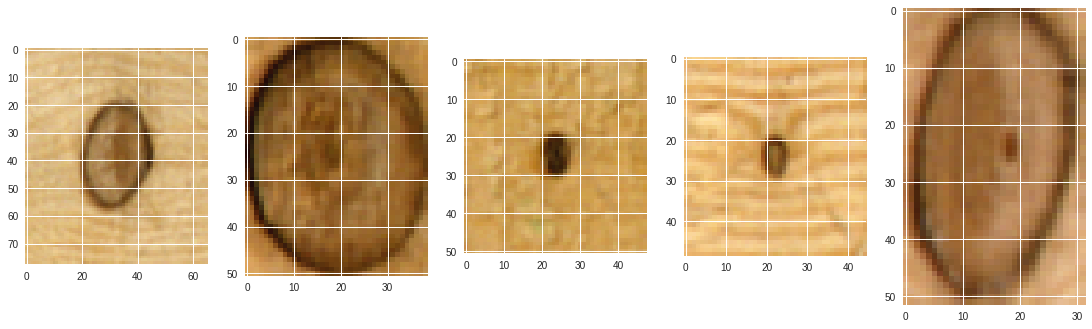

In [48]:
# Visualize original images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path =['/content/knot0005.ppm','/content/knot0017.ppm','/content/knot0011.ppm', 
       '/content/knot0007.ppm', '/content/knot0003.ppm']
fig=plt.figure(figsize=(19,19))
columns = 5
rows = 1

for i in range(1, columns*rows +1):
    img = imread(path[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

In [0]:
# reading the labels and creating a list of filenames to read to avoid imbalance

label_information = pd.read_csv('/content/names/names.txt', sep=" ", header=None)
labels = label_information[1]
labels = np.array(labels)
class_names = ['dry_knot', 'encased_knot', 'leaf_knot', 'edge_knot',
              'sound_knot', 'horn_knot', 'decayed_knot']
label_information = label_information.drop([2], axis=1)
label_information.columns = ['filenames', 'label']

In [50]:
label_information.groupby(['label']).size()

label
decayed_knot     14
dry_knot         69
edge_knot        65
encased_knot     29
horn_knot        35
leaf_knot        47
sound_knot      179
dtype: int64

In [51]:
# Always run the previous code segment when re-running this code segment
imgs = []
imgs_label = []
path = '/content'

for index, row in label_information.iterrows():
  if class_counts[row['label']]<= 16:    
    with open(row['filenames'], 'r+b') as f:
      with Image.open(f) as image:
        old_size = image.size
        new_size = (80, 80)
        new_image = Image.new("RGB", new_size)
        new_image.paste(image)
        new_image.save(row['filenames'], image.format)
      img = imread(row['filenames'])
      imgs.append(img)
      imgs_label.append(row['label'])
    class_counts[row['label']]+= 1
  else:
    continue

imgs = np.array(imgs)
imgs = imgs/255
print('Shape of Input Images',imgs.shape)

Shape of Input Images (116, 80, 80, 3)


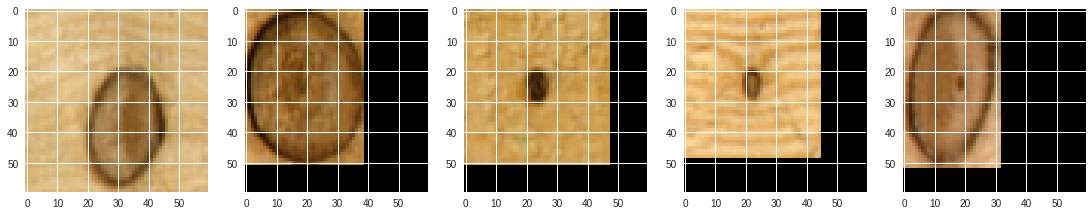

In [5]:

# Visualize resized images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path =['/content/knot0005.ppm','/content/knot0017.ppm','/content/knot0011.ppm', 
       '/content/knot0007.ppm', '/content/knot0003.ppm']
fig=plt.figure(figsize=(19,19))
columns = 5
rows = 1

for i in range(1, columns*rows +1):
    img = imread(path[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

In [6]:

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
label_binary = encoder.fit_transform(imgs_label)
Y_train, Y_test = train_test_split(label_binary, test_size=0.2, random_state=42)
print(Y_train.shape)
print(Y_test.shape)

(136, 7)
(34, 7)


In [0]:
# creating training and test set of images
X_train, X_test = train_test_split(imgs, test_size=0.2, random_state=42)


In [0]:
num_classes = label_binary.shape[1]

In [9]:
# Convolutional Neural Network Based Model for Identifying Faulty Wood Planks
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, Conv3D, Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras import regularizers
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [10]:

# Create the model
model = Sequential()
model.add(Conv2D(512, (4, 4),input_shape=(60, 60, 3), padding='same', 
                 use_bias=True, 
                 activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Conv2D(256, (4, 4),input_shape=(32, 32, 3), padding='same', 
                 activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (4, 4), activation='relu', padding='same', 
                 kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (4, 4),input_shape=(32, 32, 3), padding='same', 
                 activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (4, 4), activation='relu', padding='same', 
                 kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))
# Compile model
epochs = 600
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=True)
#sgd = SGD()
model.compile(loss='categorical_crossentropy', optimizer=sgd,
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 512, 60, 3)        492032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512, 60, 3)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 60, 3)        2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256, 60, 3)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 60, 3)        524416    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 60, 3)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 60, 3)        262272    
__________

In [12]:
# Fit the model
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=epochs, batch_size=128)

# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 108 samples, validate on 28 samples
Epoch 1/600
108/108 [==============================] - 4s 35ms/step - loss: 1.9468 - acc: 0.1389 - val_loss: 1.9465 - val_acc: 0.1429
Epoch 2/600
108/108 [==============================] - 0s 3ms/step - loss: 1.9444 - acc: 0.1852 - val_loss: 1.9464 - val_acc: 0.1429
Epoch 3/600
108/108 [==============================] - 0s 3ms/step - loss: 1.9485 - acc: 0.1574 - val_loss: 1.9462 - val_acc: 0.1429
Epoch 4/600
108/108 [==============================] - 0s 3ms/step - loss: 1.9449 - acc: 0.1944 - val_loss: 1.9460 - val_acc: 0.1429
Epoch 5/600
108/108 [==============================] - 0s 3ms/step - loss: 1.9486 - acc: 0.1111 - val_loss: 1.9459 - val_acc: 0.1429
Epoch 6/600
108/108 [==============================] - 0s 3ms/step - loss: 1.9457 - acc: 0.1759 - val_loss: 1.9456 - val_acc: 0.1429
Epoch 7/600
108/108 [==============================] - 0s 3ms/step - loss: 1.9438 - acc: 0.1944 - val_loss: 1.9454 - val_acc: 0.1429
Epoch 8/600
108/108 [==

Text(0.5,1,'Validation Loss')

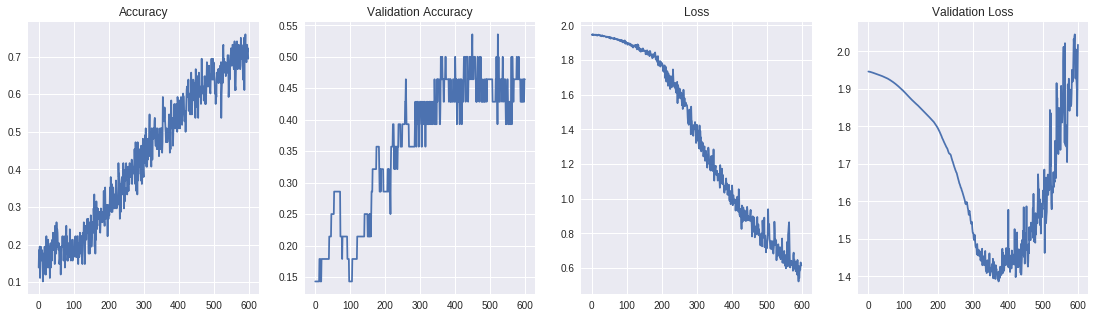

In [13]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(19,5))
columns = 4
rows = 1

fig.add_subplot(rows, columns, 1)
plt.plot(history.history['acc'])
plt.title('Accuracy')
fig.add_subplot(rows, columns, 2)
plt.plot(history.history['val_acc'])
plt.title('Validation Accuracy')
fig.add_subplot(rows, columns, 3)
plt.plot(history.history['loss'])
plt.title('Loss')
fig.add_subplot(rows, columns, 4)
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')

In [12]:
#Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
#Compute probabilities
Y_pred = model.predict(X_test)
#Assign most probable label
y_pred = np.argmax(Y_pred, axis=1)
#Plot statistics
print ('Analysis of results')

print(classification_report(np.argmax(Y_test,axis=1), y_pred))
print('Confusion Matrix\n',confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

Analysis of results
              precision    recall  f1-score   support

           0       0.12      1.00      0.21         3
           1       0.43      0.43      0.43         7
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4

   micro avg       0.18      0.18      0.18        34
   macro avg       0.08      0.20      0.09        34
weighted avg       0.10      0.18      0.11        34

Confusion Matrix
 [[3 0 0 0 0 0 0]
 [2 3 0 0 1 0 1]
 [4 1 0 0 0 0 0]
 [4 1 0 0 0 0 0]
 [5 0 0 0 0 0 0]
 [5 0 0 0 0 0 0]
 [2 2 0 0 0 0 0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Transfer Learning 

In [52]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os

In [22]:
! pip install -U scikit-learn

    100% |████████████████████████████████| 5.3MB 7.6MB/s 
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


In [72]:
# Always run the previous code segment when re-running this code segment

class_counts = {'dry_knot':0, 'encased_knot':0, 'leaf_knot':0, 'edge_knot':0,
              'sound_knot':0, 'horn_knot':0, 'decayed_knot':0}
imgs_label = []
path = '/content'
feature_list = []

for index, row in label_information.iterrows():
  if class_counts[row['label']]<= 30:     
    
    imgs_label.append(row['label'])
    img = image.load_img(row['filenames'], target_size=(70,70))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    feature = model.predict(img_data)
    feature = np.array(feature)
    feature_list.append(feature.flatten())
    class_counts[row['label']]+= 1
  else:
    continue
    
feature_list = np.array(feature_list)
print('Shape of Input Images',feature_list.shape)

Shape of Input Images (198, 2048)


In [0]:
from sklearn.model_selection import train_test_split

In [73]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
features = StandardScaler().fit_transform(feature_list)
features[:2][:2]

array([[-0.47961757, -0.11486119,  0.47195044, ..., -0.26738355,
        -0.2348229 , -0.19676842],
       [-0.47961757, -0.11486119, -0.5808895 , ..., -0.07391822,
        -0.2348229 ,  1.9527744 ]], dtype=float32)

In [0]:
import warnings
warnings.filterwarnings('ignore')
est = KBinsDiscretizer(n_bins=3, encode='ordinal', 
                       strategy = 'uniform').fit(features)
features = est.transform(features)

In [0]:

x_train, x_test, y_train, y_test = train_test_split(
    features , imgs_label, test_size=0.12, random_state=42)

In [81]:
y_test

['decayed_knot',
 'edge_knot',
 'dry_knot',
 'edge_knot',
 'horn_knot',
 'edge_knot',
 'edge_knot',
 'dry_knot',
 'dry_knot',
 'horn_knot',
 'horn_knot',
 'dry_knot',
 'encased_knot',
 'encased_knot',
 'edge_knot',
 'encased_knot',
 'edge_knot',
 'dry_knot',
 'horn_knot',
 'leaf_knot',
 'edge_knot',
 'horn_knot',
 'encased_knot',
 'sound_knot',
 'decayed_knot',
 'decayed_knot',
 'edge_knot',
 'horn_knot',
 'edge_knot',
 'horn_knot',
 'decayed_knot',
 'leaf_knot',
 'edge_knot',
 'leaf_knot',
 'dry_knot',
 'sound_knot',
 'leaf_knot',
 'horn_knot',
 'dry_knot',
 'horn_knot']

In [0]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear').fit(x_train, y_train)
y_pred = svc_model.predict(x_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print('Confusion Matrix \n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

decayed_knot       1.00      1.00      1.00         1
    dry_knot       1.00      1.00      1.00         5
   edge_knot       1.00      0.86      0.92         7
encased_knot       1.00      0.75      0.86         4
   horn_knot       0.75      0.60      0.67         5
   leaf_knot       0.33      1.00      0.50         1
  sound_knot       0.50      1.00      0.67         1

   micro avg       0.83      0.83      0.83        24
   macro avg       0.80      0.89      0.80        24
weighted avg       0.90      0.83      0.85        24

Confusion Matrix 

[[1 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 6 0 1 0 0]
 [0 0 0 3 0 0 1]
 [0 0 0 0 3 2 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]
